# A flexible extended generalized Pareto distribution for tail estimation

Philmon Gamet$^{1,2}$ & Jonathan Jalbert$^2$

$^1$Descartes Underwriting  
$^2$Polytechnique Montréal


This program goes along with the paper of Gamet & Jalbert (2022) available *via* this [link](https://doi.org/10.1002/env.2744). This program defines the extended generalized Pareto distributions described in the paper and provides the code to reproduce the results.

Requirements : 
- Julia 1.6 and newer;
- Jupyter notebook.

<div class="alert alert-block alert-info">
<b>Note :</b> The Extremes.jl and ExtendedExtremes.jl libraries are currently being refactored. That's why the versions used in this notebook are different from those of the master branches. 
</div>


### Reference
Gamet, P. & Jalbert, J. (2022). A flexible extended generalized Pareto distribution for tail estimation. *Environmetrics*, 33(6), e2744.



In [1]:
using CSV, DataFrames, Dates, Distributions, Random

using ProgressMeter

import Cairo, Fontconfig, Gadfly

using Plots

Plots.default(size=(400,300)) #Plot canvas size
Plots.default(dpi=300) #Only for PyPlot - presently broken

In [2]:
# import Pkg

# Pkg.add(url = "https://github.com/jojal5/Extremes.jl", rev = "refactor/replace-mamba")
# Pkg.add(url = "https://github.com/JuliaExtremes/ExtendedExtremes.jl", rev = "dev")

using Extremes, ExtendedExtremes

### Plot functions

In [3]:
function histplot(y::Vector{Float64}, pd::Distribution, lbound::Real, ubound::Real)
    
    x = range(lbound, stop=ubound, length= 100)
    
    fig = Plots.histogram(y, normed=true, alpha=0.6, label="", c=:grey, legend=false)
    Plots.plot!(x, Distributions.pdf.(pd, x), label="", c=:black, linewidth = 1.5)
    Plots.plot!(xlim = (lbound, ubound))
    
end

function histplot(y::Vector{Float64}, pd::Distribution)
    
    n = length(y)
    
    lbound = 0
    ubound = quantile(pd, 1-1/n/100)
    
    histplot(y, pd, lbound, ubound)
    
end

function returnlevelplot(y::Vector{Float64}, pd::Distribution)
    
    n = length(y)
    q = sort(y)
 
    p = (1:n) ./ (n+1)
    
    t = 1 ./ (1 .- p)
    
    Plots.plot(t, q, xaxis=:log10, seriestype=:scatter, markerstrokewidth=0, markercolor=:grey, label="")
    Plots.plot!(t, quantile.(pd, p), label="", ls=:dash, color=:black)
    
end

function qqplot(y::Vector{Float64}, pd::Distribution)
    
    n = length(y)
    q = sort(y)
    
    p = (1:n) ./ (n+1)
    
    q̂ = quantile.(pd, p)
    
    Plots.plot(q, q̂, seriestype = :scatter, markerstrokewidth=0, markercolor=:grey, label="",
        xlabel="empirical quantile", ylabel="estimated quantile")
    Plots.plot!(q[[1, end]], q[[1, end]], label="", ls=:dash, color=:black)
end

qqplot (generic function with 1 method)

# 2 Extended generalized Pareto (EGP) distributions

## 2.1 Existing EGP based on the power function

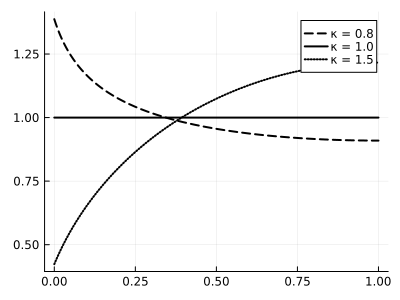

In [4]:
# Figure 1(a)

Plots.plot(x -> pdf(TBeta(.8), x), 0 , 1, label="κ = 0.8", color=:black, ls=:dash, lw=2)
Plots.plot!(x -> pdf(TBeta(1), x), 0 , 1, label="κ = 1.0", color=:black, lw=2)
Plots.plot!(x -> pdf(TBeta(1.5), x), 0 , 1, label = "κ = 1.5", color=:black, lw=2, ls=:dot)

# Plots.savefig("figures/V_Power.pdf")

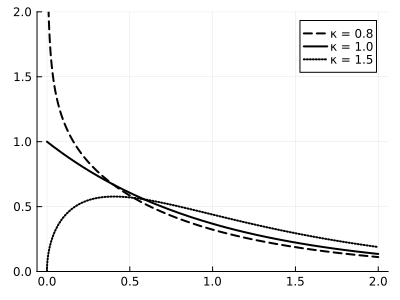

In [5]:
# Figure 1(b)

Plots.plot(x -> pdf(ExtendedGeneralizedPareto(Power(0.8), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 0.8", ylims=[0, 2], color=:black, ls=:dash, lw=2)
Plots.plot!(x -> pdf(ExtendedGeneralizedPareto(Power(1.0), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 1.0", color=:black, lw=2)
Plots.plot!(x -> pdf(ExtendedGeneralizedPareto(Power(1.5), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 1.5", color=:black, ls=:dot, lw=2)

# Plots.savefig("figures/EGP_Power.pdf")

## 2.3 EGP model based on the truncated normal distribution

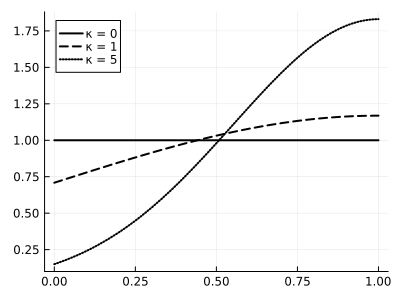

In [6]:
# Figure 2(a)

Plots.plot(x -> pdf(TNormal(.00001), x), 0 , 1, label="κ = 0", color=:black, lw=2, legend=:topleft)
Plots.plot!(x -> pdf(TNormal(1), x), 0 , 1, label="κ = 1", color=:black, ls=:dash, lw=2)
Plots.plot!(x -> pdf(TNormal(5), x), 0 , 1, label = "κ = 5", color=:black, ls=:dot, lw=2)

# Plots.savefig("figures/V_TNormal.pdf")

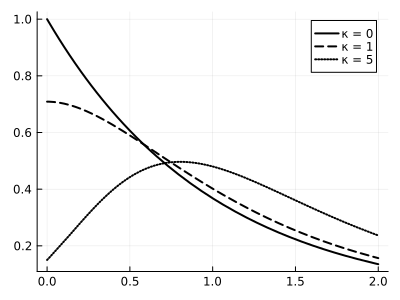

In [7]:
# Figure 2(b)

Plots.plot(x -> pdf(ExtendedGeneralizedPareto(TNormal(.00001), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 0", color=:black, lw=2)
Plots.plot!(x -> pdf(ExtendedGeneralizedPareto(TNormal(1), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 1", color=:black, ls=:dash, lw=2)
Plots.plot!(x -> pdf(ExtendedGeneralizedPareto(TNormal(5), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 5", color=:black, ls=:dot, lw=2)

# Plots.savefig("figures/EGP_TNormal.pdf")

## 2.4 EGP model based on the truncated Beta distribution

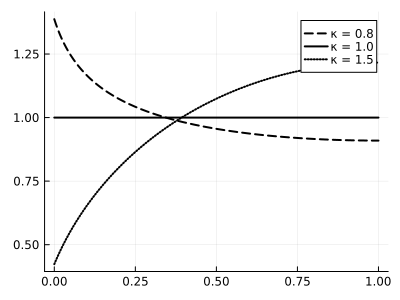

In [8]:
# Figure 3(a)

Plots.plot(x -> pdf(TBeta(.8), x), 0 , 1, label="κ = 0.8", color=:black, ls=:dash, lw=2)
Plots.plot!(x -> pdf(TBeta(1), x), 0 , 1, label="κ = 1.0", color=:black, lw=2)
Plots.plot!(x -> pdf(TBeta(1.5), x), 0 , 1, label = "κ = 1.5", color=:black, lw=2, ls=:dot)

# Plots.savefig("figures/V_TBeta.pdf")

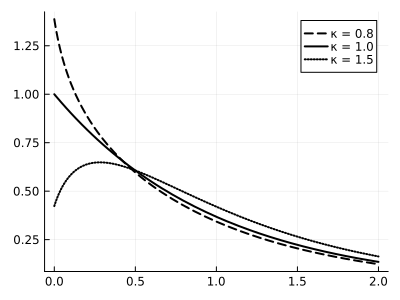

In [9]:
# Figure 3(b)

Plots.plot(x -> pdf(ExtendedGeneralizedPareto(TBeta(0.8), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 0.8", color=:black, ls=:dash, lw=2)
Plots.plot!(x -> pdf(ExtendedGeneralizedPareto(TBeta(1.0), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 1.0", color=:black, lw=2)
Plots.plot!(x -> pdf(ExtendedGeneralizedPareto(TBeta(1.5), GeneralizedPareto(1,0)), x), 0 , 2,
    label="κ = 1.5", color=:black, ls=:dot, lw=2)

# Plots.savefig("figures/EGP_TBeta.pdf")

# 3. Simulation study

## 3.2 Parameter estimates

In [10]:
# pd = GeneralizedExtremeValue(2,1,.1)

# res_ht = DataFrame(Iter = Int64[], Threshold = Float64[], Distribution = String[], κ = Float64[], σ = Float64[], ξ = Float64[])

# thresholds=0:.2:5

# @showprogress for iter in 1:1000
# # @time Threads.@threads for iter in 1:1000

#     y = rand(pd, 3000)

#     for u in thresholds

#         z = y[y.>u] .- u

#         fd = gpfit(z)
#         push!(res_ht, [iter, u, "Uniform", 1.0, fd.θ̂...])
        
#         fd = fit(ExtendedGeneralizedPareto{TBeta}, z)
#         push!(res_ht, [iter, u, "TBeta", shape(fd)[1], scale(fd), tailindex(fd)])
        
#         fd = fit(ExtendedGeneralizedPareto{Power}, z)
#         push!(res_ht, [iter, u, "Power", shape(fd)[1], scale(fd), tailindex(fd)])
        
#         fd = fit(ExtendedGeneralizedPareto{TNormal}, z)
#         push!(res_ht, [iter, u, "TNormal", shape(fd)[1], scale(fd), tailindex(fd)])
        
#     end
    
# end

# CSV.write("Results/simulations_heavytailed.csv",res_ht)

res_ht = CSV.read("Results/simulations_heavytailed.csv", DataFrame)


first(res_ht, 4)

Row,Iter,Threshold,Distribution,κ,σ,ξ
,Int64,Float64,String7,Float64,Float64,Float64
1,1,0.0,Uniform,1.0,1.14511,-0.236155
2,1,0.0,TBeta,7.18594,1.40316,-0.015143
3,1,0.0,Power,5.84449,1.00652,0.054487
4,1,0.0,TNormal,17.4307,1.25805,0.0179382


In [11]:
DISTRIBUTION = "Uniform"
# DISTRIBUTION = "Power"
# DISTRIBUTION = "TBeta"
# DISTRIBUTION = "TNormal"

pd = GeneralizedExtremeValue(2,1,.1)

df = filter(row -> row.Distribution==DISTRIBUTION, res_ht)

df2 = combine(groupby(df, :Threshold),
    :κ => mean => :κ̂,
    :σ => mean => :σ̂, 
    :ξ => mean => :ξ̂, 
    :κ => (x->quantile(x,.025)) => :κ̂₁,
    :κ => (x->quantile(x,.975)) => :κ̂₂,
    :σ => (x->quantile(x,.025)) => :σ̂₁,
    :σ => (x->quantile(x,.975)) => :σ̂₂,
    :ξ => (x->quantile(x,.025)) => :ξ̂₁,
    :ξ => (x->quantile(x,.975)) => :ξ̂₂,
)

if DISTRIBUTION == "Uniform"
    df2.σ̂ = exp.(df2.σ̂)
    df2.σ̂₁ = exp.(df2.σ̂₁)
    df2.σ̂₂ = exp.(df2.σ̂₂)
end

first(df2, 5)

Row,Threshold,κ̂,σ̂,ξ̂,κ̂₁,κ̂₂,σ̂₁,σ̂₂,ξ̂₁,ξ̂₂
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,1.0,3.09583,-0.201055,1.0,1.0,2.91623,3.26498,-0.274347,-0.117558
2,0.2,1.0,2.85319,-0.186272,1.0,1.0,2.68665,3.00872,-0.255782,-0.107276
3,0.4,1.0,2.61667,-0.17081,1.0,1.0,2.46489,2.75685,-0.235624,-0.0963494
4,0.6,1.0,2.39171,-0.154505,1.0,1.0,2.25345,2.51723,-0.214559,-0.0853654
5,0.8,1.0,2.18486,-0.137027,1.0,1.0,2.06507,2.29665,-0.191092,-0.0742033


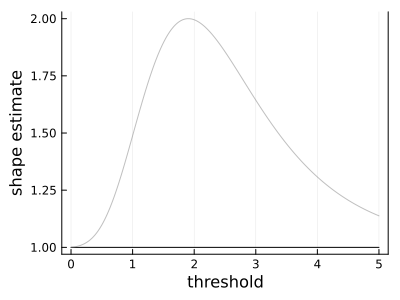

In [12]:
l = df2.κ̂  - df2.κ̂₁ 
u = df2.κ̂₂ - df2.κ̂ 

Plots.plot(df2.Threshold, df2.κ̂, ribbon=(l, u), 
    xlabel="threshold", ylabel="shape estimate", c=:black, fillalpha=0.3, label="")
# Plots.plot!(ylims=[0, 8], yticks=0:8)
Plots.plot!(Plots.twinx(), 0:0.01:5, Distributions.pdf.(pd,0:0.01:5), alpha=0.5, label="", yaxis=nothing, c=:grey)
# Plots.savefig(string("figures/simht_",DISTRIBUTION,"_kappa.pdf"))

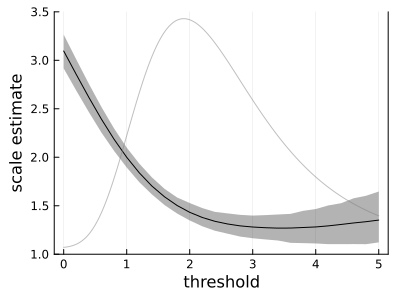

In [13]:
l = df2.σ̂  - df2.σ̂₁ 
u = df2.σ̂₂ - df2.σ̂ 

Plots.plot(df2.Threshold, df2.σ̂, ribbon=(l, u), 
    xlabel="threshold", ylabel="scale estimate", c=:black, fillalpha=0.3, label="")
Plots.plot!(ylims=[1, 3.5], yticks=1:.5:3.5)
Plots.plot!(Plots.twinx(), 0:0.01:5, Distributions.pdf.(pd,0:0.01:5), alpha=0.5, label="", yaxis=nothing, c=:grey)
# Plots.savefig(string("figures/simht_",DISTRIBUTION,"_sigma.pdf"))

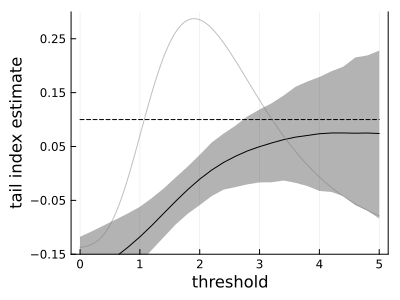

In [14]:
l = df2.ξ̂  - df2.ξ̂₁ 
u = df2.ξ̂₂ - df2.ξ̂ 

Plots.plot(df2.Threshold, df2.ξ̂, ribbon=(l, u), 
    xlabel="threshold", ylabel="tail index estimate", c=:black, fillalpha=0.3, label="")
Plots.plot!(df2.Threshold[[1,end]],[shape(pd), shape(pd)], label="", c=:black, linestyle=:dash)
Plots.plot!(ylims=[-.15, .3], yticks=-.15:.1:.3)
Plots.plot!(Plots.twinx(), 0:0.01:5, Distributions.pdf.(pd,0:0.01:5), alpha=0.5, label="", yaxis=nothing, c=:grey)
# Plots.savefig(string("figures/simht_",DISTRIBUTION,"_xi.pdf"))

## Density estimation

In [15]:
pd = GeneralizedExtremeValue(2,1,.1)

u = 2

y = rand(pd, 3000)

z = y[y.>u] .- u;

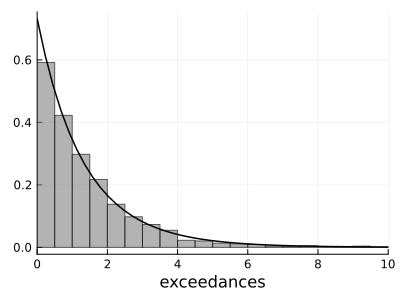

In [16]:
# Figure 6(a)

fd = gpfit(z)

histplot(z, Extremes.getdistribution(fd)[])
Plots.plot!(xlabel="exceedances", xlim=[0,10])
# Plots.savefig("figures/GP_density_Frechet.pdf")

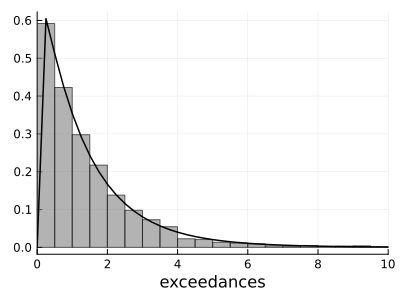

In [17]:
# Figure 6(b)

fd = fit(ExtendedGeneralizedPareto{Power},z)

histplot(z, fd)
Plots.plot!(xlabel="exceedances", xlim=[0,10])
# Plots.savefig("figures/EGPpower_density_Frechet.pdf")

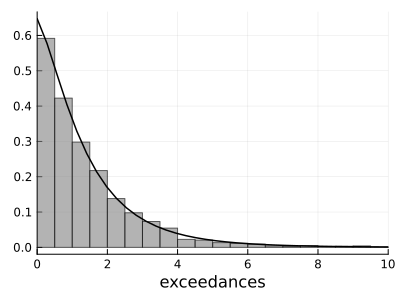

In [18]:
# Figure 6(c)

fd = fit(ExtendedGeneralizedPareto{TNormal},z)

histplot(z, fd)
Plots.plot!(xlabel="exceedances", xlim=[0,10])
# Plots.savefig("figures/EGPnormal_density_Frechet.pdf")

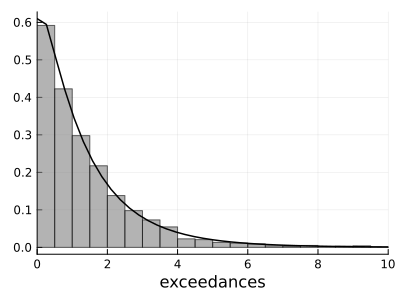

In [19]:
# Figure 6(d)

fd = fit(ExtendedGeneralizedPareto{TBeta},z)

histplot(z, fd)
Plots.plot!(xlabel="exceedances", xlim=[0,10])
# Plots.savefig("figures/EGPbeta_density_Frechet.pdf")

## 3.3 Quantile estimation

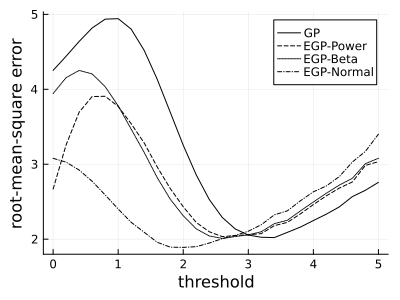

In [20]:
pd = GeneralizedExtremeValue(2,1,.1)

p = 1/10000

q = quantile(pd, 1-p)

q̂ = Float64[]

for r in eachrow(res_ht)

    if r.Distribution == "Uniform"
        V = Uniform(0,1)
    elseif r.Distribution == "Power"
        V = Power(r.κ)
    elseif r.Distribution == "TBeta"
        V = TBeta(r.κ)
    elseif r.Distribution == "TNormal"
        V = TNormal(r.κ)
    end
    
    if r.Distribution == "Uniform"
        G = GeneralizedPareto(exp(r.σ), r.ξ)
    else
        G = GeneralizedPareto(r.σ, r.ξ)
    end
    
    fd = ExtendedGeneralizedPareto(V, G)
    
    # Probability of exceeding the treshold
    ζ = ccdf(pd,r.Threshold)
    
    push!(q̂, r.Threshold + quantile(fd, 1-p/ζ))
    
end
        
sim_ht = deepcopy(res_ht)
sim_ht[:,:q] = q̂

sim_ht[:,:d²] = (q̂ .- q).^2
    

df = combine(groupby(sim_ht, [:Threshold, :Distribution]), :d² => mean => :MSE)

# plot(df, x=:Threshold, y=:MSE, color=:Distribution, Geom.line)

df2 = filter(row -> row.Distribution == "Uniform", df)
Plots.plot(df2.Threshold, sqrt.(df2.MSE), c=:black, label="GP", xlabel="threshold", ylabel="root-mean-square error")

df2 = filter(row -> row.Distribution == "Power", df)
Plots.plot!(df2.Threshold, sqrt.(df2.MSE), c=:black, ls=:dash, label="EGP-Power")

df2 = filter(row -> row.Distribution == "TBeta", df)
Plots.plot!(df2.Threshold, sqrt.(df2.MSE), c=:black, ls=:dot, label="EGP-Beta")

df2 = filter(row -> row.Distribution == "TNormal", df)
Plots.plot!(df2.Threshold, sqrt.(df2.MSE), c=:black, ls=:dashdot, label="EGP-Normal")

# Plots.savefig(string("figures/simht_rmse.pdf"))

# 4. Application to summer temperatures recorded in Montréal

## 4.1 Data

In [21]:
data = CSV.read("Data/tasmax.csv", DataFrame)

filter!(row -> row.Date>= Date(2000,1,1), data)
filter!(row -> month(row.Date) in 6:8, data)
data.tasmax = coalesce.(data.tasmax, 0)
dropmissing!(data)

first(data, 5)

Row,Longitude,Latitude,Name,ID,Date,tasmax
,Float64,Float64,String,Int64,Date,Real
1,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-06-01,24.4
2,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-06-02,21.9
3,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-06-03,21.9
4,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-06-04,16.1
5,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-06-05,20.1


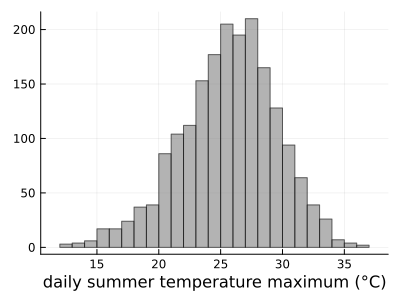

In [22]:
df = filter(row->row.tasmax>0, data)

nbin = floor(Int64, sqrt(nrow(df)))

fig = Plots.histogram(df.tasmax, alpha=0.6, label="", c=:grey, legend=false,
    xlabel="daily summer temperature maximum (°C)")

# Plots.savefig(string("figures/Temp_summer.pdf"))

## 4.2 Threshold selection

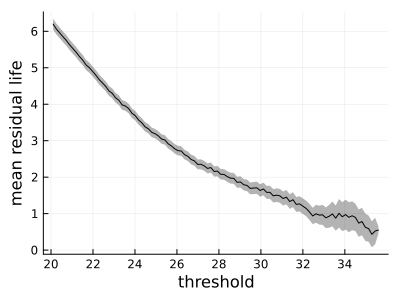

In [23]:
# Figure 9(a)

u = 20

ind = data.tasmax.>u
x = year.(data.Date[ind])
y = data.tasmax[ind]


plot_data = mrlplot_data(y)

Plots.plot(plot_data.Threshold, plot_data.mrl, 
    ribbon=(plot_data.mrl-plot_data.lbound, plot_data.ubound-plot_data.mrl),
    xlabel="threshold", ylabel="mean residual life", label="", c=:black, fillalpha=0.3, xticks = 20:2:35)

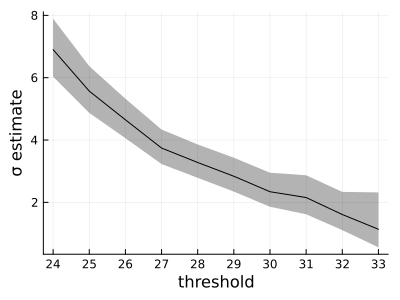

In [24]:
# Figure 9(b)

df_shape = DataFrame(threshold = Float64[], ξ̂ = Float64[], lbound = Float64[], ubound = Float64[])
df_scale = DataFrame(threshold = Float64[], σ̂ = Float64[], lbound = Float64[], ubound = Float64[])

threshold = 24:33

for u in threshold
    cluster = Extremes.getcluster(data.tasmax, u, runlength=1)
    y = maximum.(cluster) .- u
#     y = data.tasmax[data.tasmax.>u] .- u
    fd = gpfit(y)
    
    push!(df_scale, [u, exp(fd.θ̂[1]), exp.(cint(fd)[1])...])
    push!(df_shape, [u, fd.θ̂[2], cint(fd)[2]...])

end

Plots.plot(df_scale.threshold, df_scale.σ̂,
    ribbon=(df_scale.σ̂-df_scale.lbound, df_scale.ubound-df_scale.σ̂),
    xlabel="threshold", ylabel="σ estimate", label="", c=:black, fillalpha=0.3, xticks = 24:1:33)

# Plots.savefig("figures/Temp_scale_stability.pdf")

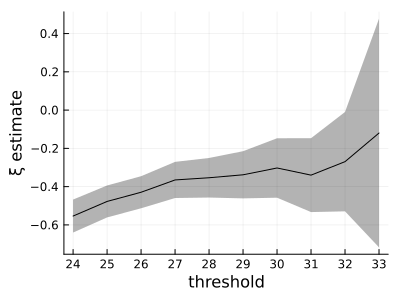

In [25]:
# Figure 9(c)

Plots.plot(df_shape.threshold, df_shape.ξ̂,
    ribbon=(df_shape.ξ̂-df_shape.lbound, df_shape.ubound-df_shape.ξ̂),
    xlabel="threshold", ylabel="ξ estimate", label="", c=:black, fillalpha=0.3, xticks = 24:1:33)

# Plots.savefig("figures/Temp_tail_stability.pdf")

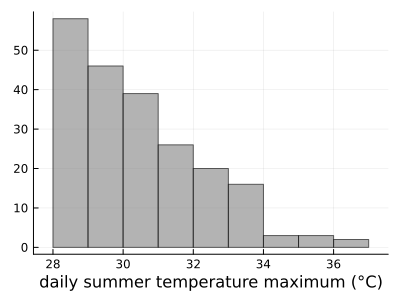

In [26]:
# Figure 10(a)

cluster = Extremes.getcluster(df.tasmax, 28, runlength=1)
y = maximum.(cluster)

fig = Plots.histogram(y, alpha=0.6, label="", c=:grey, legend=false,
    xlabel="daily summer temperature maximum (°C)")

# Plots.savefig(string("figures/Temp_summer_28.pdf"))

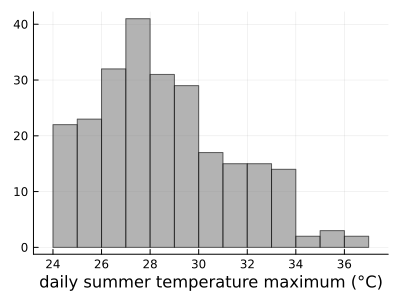

In [27]:
# Figure 10(b)

cluster = Extremes.getcluster(df.tasmax, 24, runlength=1)
y = maximum.(cluster)

fig = Plots.histogram(y, alpha=0.6, label="", c=:grey, legend=false,
    xlabel="daily summer temperature maximum (°C)")

# Plots.savefig(string("figures/Temp_summer_24.pdf"))

## 4.3 High threshold

In [28]:
# Threshold definition
u₁ = 28

cluster = Extremes.getcluster(data.tasmax, u₁, runlength=1)

x₁ = Int64[]
for c in cluster
    ind = c.position[1]
    push!(x₁, year(data.Date[ind]) )
end

y₁ = maximum.(cluster)

z₁ = y₁ .- u₁;
ζ₁ = count(data.tasmax .> u₁)/nrow(data)

0.2650103519668737

In [29]:
# Model fit and BIC calculation

df = DataFrame(Model = String[], BIC = Float64[])

let z = z₁

    n = length(z)

    fd1 = gpfit(z)
    pd = Extremes.getdistribution(fd1)[]
    push!(df, ["Uniform", loglikelihood(pd, z) - 2/2*log(n)])

    fd2 = fit(ExtendedGeneralizedPareto{Power}, z)
    push!(df, ["Power", loglikelihood(fd2, z) - 3/2*log(n)])

    fd3 = fit(ExtendedGeneralizedPareto{TNormal}, z)
    push!(df, ["Normal", loglikelihood(fd3, z) - 3/2*log(n)])

    fd4 = fit(ExtendedGeneralizedPareto{TBeta}, z)
    push!(df, ["Beta", sum(logpdf.(fd4, z)) - 3/2*log(n)])
    
end


Row,Model,BIC
,String,Float64
1,Uniform,-397.886
2,Power,-399.447
3,Normal,-400.277
4,Beta,-399.927


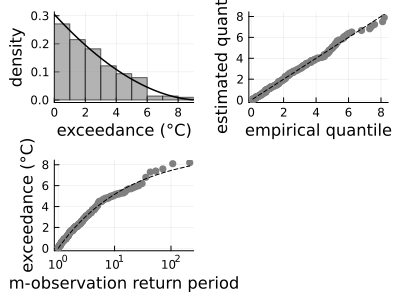

In [30]:
# Figure 11

let z = z₁

    fm = gpfit(z)
    pd = Extremes.getdistribution(fm)[]

    fig1 = histplot(z, pd)
    Plots.plot!(xlabel="exceedance (°C)", ylabel="density")
#     Plots.savefig("figures/Montreal_GP_histplot_28.pdf")
    
    fig2 = qqplot(z, pd)
#     Plots.savefig("figures/Montreal_GP_qqplot_28.pdf")
    
    fig3 = returnlevelplot(z, pd)
    Plots.plot!(xlabel="m-observation return period", ylabel = "exceedance (°C)")
#     Plots.savefig("figures/Montreal_GP_rtplot_28.pdf")
    
    plot(fig1, fig2, fig3)
    
end

## 4.4 Low threshold

In [31]:
# Threshold definition
u₂ = 24

cluster = Extremes.getcluster(data.tasmax, u₂, runlength=1)

x₂ = Int64[]
for c in cluster
    ind = c.position[1]
    push!(x₂, year(data.Date[ind]) )
end

y₂ = maximum.(cluster)

z₂ = y₂ .- u₂;

ζ₂ = count(data.tasmax .> u₂)/nrow(data)

0.6728778467908902

In [32]:
# Model fit and BIC calculation

df = DataFrame(Model = String[], BIC = Float64[])

let z = z₂

    n = length(z)

    fd1 = gpfit(z)
    pd = Extremes.getdistribution(fd1)[]
    push!(df, ["Uniform", loglikelihood(pd, z) - 2/2*log(n)])

    fd2 = fit(ExtendedGeneralizedPareto{Power}, z)
    push!(df, ["Power", loglikelihood(fd2, z) - 3/2*log(n)])

    fd3 = fit(ExtendedGeneralizedPareto{TNormal}, z)
    push!(df, ["Normal", loglikelihood(fd3, z) - 3/2*log(n)])

    fd4 = fit(ExtendedGeneralizedPareto{TBeta}, z)
    push!(df, ["Beta", sum(logpdf.(fd4, z)) - 3/2*log(n)])
    
end

Row,Model,BIC
,String,Float64
1,Uniform,-600.023
2,Power,-597.134
3,Normal,-595.911
4,Beta,-596.607


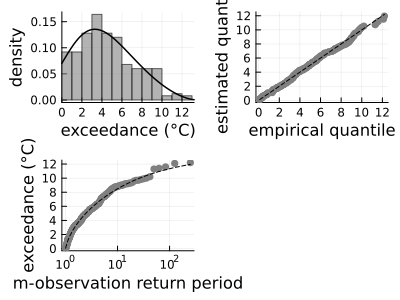

In [33]:
# Figure 12

let z = z₂

    fd = fit(ExtendedGeneralizedPareto{TNormal}, z)

    fig1 = histplot(z, fd)
    Plots.plot!(xlabel="exceedance (°C)", ylabel="density")
#     Plots.savefig("figures/Montreal_EGP_histplot_24.pdf")
    
    fig2 = qqplot(z, fd)
#     Plots.savefig("figures/Montreal_EGP_qqplot_24.pdf")
    
    fig3 = returnlevelplot(z, fd)
    Plots.plot!(xlabel="m-observation return period", ylabel = "exceedance (°C)")
#     Plots.savefig("figures/Montreal_EGP_rtplot_24.pdf")
    
    plot(fig1, fig2, fig3)
    
end

# 5. Application to summer precipitation recorded in Montréal

## 5.1 Data

In [34]:
data = CSV.read("Data/pcp.csv", DataFrame)
filter!(row -> row.Date>= Date(2000,1,1), data)
filter!(row -> month(row.Date) in 5:10, data)
dropmissing!(data)

first(data,5)

Row,Longitude,Latitude,Name,ID,Date,pcp
,Float64,Float64,String,Int64,Date,Float64
1,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-05-01,1.0
2,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-05-02,0.0
3,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-05-03,0.0
4,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-05-04,0.5
5,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2000-05-05,0.0


## 5.2 Tail analysis

In [35]:
u = 30
z = data.pcp[data.pcp.>u] .- u

fm = gpfit(z)

MaximumLikelihoodEVA
model :
	ThresholdExceedance
	data :		Vector{Float64}[68]
	logscale :	ϕ ~ 1
	shape :		ξ ~ 1

θ̂  :	[2.3496807328812777, 0.014427338669456797]


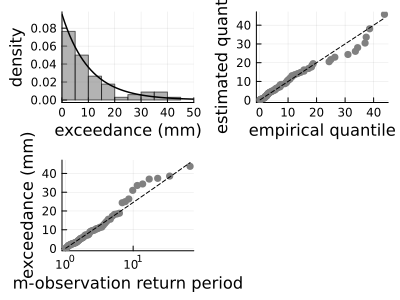

In [36]:
# Figure 13

fd = Extremes.getdistribution(fm)[]

fig1 = histplot(z, fd)
Plots.plot!(xlabel="exceedance (mm)", ylabel="density", xlims=[0, 50])
# Plots.savefig("figures/Pcp_GP_histplot_30.pdf")
    
fig2 = qqplot(z, fd)
# Plots.savefig("figures/Pcp_GP_qqplot_30.pdf")
    
fig3 = returnlevelplot(z, fd)
Plots.plot!(xlabel="m-observation return period", ylabel = "exceedance (mm)")
# Plots.savefig("figures/Pcp_GP_rtplot_30.pdf")

plot(fig1, fig2, fig3)

## 5.3 Modeling the non-zero precipitation

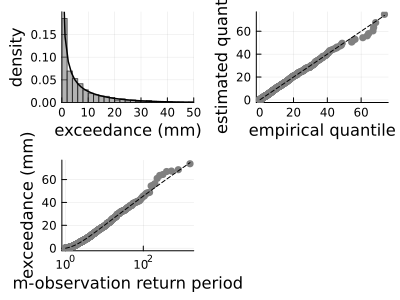

In [37]:
# Figure 14

u = 0.0
y = data.pcp[data.pcp .> u] .- u;

fd = fit_mle(ExtendedGeneralizedPareto{TBeta}, y)

fig1 = histplot(y, fd)
Plots.plot!(xlabel="exceedance (mm)", ylabel="density", xlims=[0, 50], ylims=[0, .2])
# Plots.savefig("figures/Pcp_EGPbeta_histplot.pdf")
    
fig2 = qqplot(y, fd)
# Plots.savefig("figures/Pcp_EGPbeta_qqplot.pdf")
    
fig3 = returnlevelplot(y, fd)
Plots.plot!(xlabel="m-observation return period", ylabel = "exceedance (mm)")
# Plots.savefig("figures/Pcp_EGPbeta_rtplot.pdf")

plot(fig1, fig2, fig3)